In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from scipy.cluster import hierarchy
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
al = pd.read_csv(r"C:\Users\surya\Downloads\EastWestAirlines.csv")

In [4]:
al.head()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [5]:
#Standarizng the data -  the data will be in the range of -3 to 3
Scaler = StandardScaler()

In [6]:
SD1 = al.drop("ID",axis=1)

In [7]:
#Transfroming the data into standarized data
SD = Scaler.fit_transform(SD1)

In [8]:
print(SD)

[[-4.51140783e-01 -1.86298687e-01 -7.69578406e-01 ... -3.62167870e-01
   1.39545434e+00 -7.66919299e-01]
 [-5.39456874e-01 -1.86298687e-01 -7.69578406e-01 ... -3.62167870e-01
   1.37995704e+00 -7.66919299e-01]
 [-3.20031232e-01 -1.86298687e-01 -7.69578406e-01 ... -3.62167870e-01
   1.41192021e+00 -7.66919299e-01]
 ...
 [-4.29480975e-05 -1.86298687e-01  6.83121167e-01 ... -3.62167870e-01
  -1.31560393e+00  1.30391816e+00]
 [-1.85606976e-01 -1.86298687e-01 -7.69578406e-01 ... -9.85033311e-02
  -1.31608822e+00 -7.66919299e-01]
 [-7.00507951e-01 -1.86298687e-01 -7.69578406e-01 ... -3.62167870e-01
  -1.31754109e+00 -7.66919299e-01]]


In [9]:
Sd = pd.DataFrame(SD)
Sd.columns=SD1.columns

### KMeans Clustering

In [10]:
# creating a object for KMeans Cluster
KM = KMeans(n_clusters=3)

In [11]:
#Fitting the data into model
a=KM.fit(SD)

In [12]:
a.labels_

array([1, 1, 1, ..., 2, 1, 1])

In [13]:
#collecting the inertias for the clusters
inertia=[]
for k in range(1,11):
    Kmean = KMeans(n_clusters=k)
    Kmean.fit(SD)
    
    inertia.append(Kmean.inertia_)
inertia

[43989.0,
 35409.51662986131,
 30899.271221785588,
 27155.058983585586,
 24836.84005508282,
 21470.860946462708,
 18893.590921487506,
 17369.018736074064,
 15960.592441726789,
 14728.017247862415]

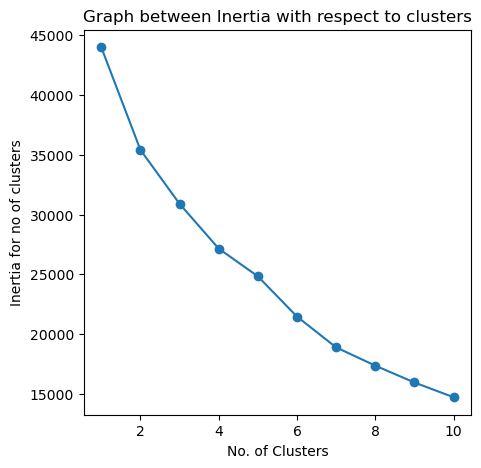

In [14]:
#plotting the graph for collected Inertia's
fig = plt.subplots(figsize=(5,5))
plt.plot(range(1,11),inertia,'o-')
plt.title("Graph between Inertia with respect to clusters")
plt.xlabel("No. of Clusters")
plt.ylabel("Inertia for no of clusters")
plt.show()

From the above graph we can observe that optimal clusters are 5. So now we try to build a model which is having 5 clusters.

In [15]:
#creating a model based on 5 clusters.
FinalKM = KMeans(n_clusters=5)

In [16]:
K=FinalKM.fit(SD)

In [17]:
FinalKM.labels_

array([1, 1, 1, ..., 0, 1, 1])

In [18]:
#Keeping the Labels in the dataframe for better understanding
Sd['KMeans1']=FinalKM.labels_

In [19]:
Grp = Sd.groupby('KMeans1')
Values = Sd.groupby('KMeans1').count()
Values

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
KMeans1,,,,,,,,,,,
0,1238,1238,1238,1238,1238,1238,1238,1238,1238,1238,1238
1,2524,2524,2524,2524,2524,2524,2524,2524,2524,2524,2524
2,61,61,61,61,61,61,61,61,61,61,61
3,43,43,43,43,43,43,43,43,43,43,43
4,133,133,133,133,133,133,133,133,133,133,133


In [20]:
Grp.agg('mean')

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
KMeans1,,,,,,,,,,,
0,0.444823,-0.111719,1.216443,-0.098242,0.135845,0.967815,0.773370,-0.071310,-0.079122,0.375584,0.581300
1,-0.292060,-0.129426,-0.593747,-0.098242,-0.060737,-0.512897,-0.485877,-0.179614,-0.193356,-0.195954,-0.344383
2,0.457104,6.731092,-0.043229,-0.098242,-0.062767,0.063717,0.065358,0.359694,0.394247,-0.071223,0.387318
3,-0.046890,-0.156236,-0.668227,9.038254,-0.062767,-0.101665,0.617851,0.087549,0.220347,-0.072464,0.051784
4,1.207538,0.459416,0.180684,-0.098242,-0.062767,0.728435,1.792235,3.879119,4.153831,0.278764,0.930233


From the above table we can observe the mean of each column, this describes the how the clusters are formed for the following columns.

In [21]:
for x, y in Grp:
    print(y)
    print('_______________'*5)

       Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
4     0.239678   -0.186299   1.409471  -0.098242  -0.062767     1.083121   
6     0.112270   -0.186299   0.683121  -0.098242  -0.062767     0.428076   
9     0.310220   -0.186299   0.683121  -0.098242  -0.062767     0.467168   
11    0.227471   -0.186299   2.135821  -0.098242  -0.062767     1.820451   
15   -0.447647   -0.186299   1.409471  -0.098242  -0.062767     1.337470   
...        ...         ...        ...        ...        ...          ...   
3979 -0.156886   -0.186299   0.683121  -0.098242  -0.062767     0.157949   
3980 -0.443956   -0.186299   0.683121  -0.098242  -0.062767     0.083823   
3985 -0.144739   -0.186299   1.409471  -0.098242  -0.062767     0.728888   
3991 -0.341984   -0.186299   0.683121  -0.098242  -0.062767    -0.089608   
3996 -0.000043   -0.186299   0.683121  -0.098242  -0.062767     0.343804   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
4        1.

So now we can observe all the records based on the cluster label.

### Now we will see DBSCAN Clustering Model

In [22]:
#Creating a DBScan Clustering model 
DBS = DBSCAN(eps=0.5,min_samples=20).fit(SD)

In [23]:
labels1 = DBS.labels_

In [24]:
n_clusters_ = len(set(labels1)) - (1 if -1 in labels1 else 0)

In [25]:
n_clusters_

5

So the DBSCAN model identified 5 clusters based on the given requirements.

In [26]:
Sd['DBScan']=labels1

In [27]:
Grp1 = Sd.groupby('DBScan')
Values1 =  Sd.groupby('DBScan').count()
Values1

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,KMeans1
DBScan,,,,,,,,,,,,
-1,2135,2135,2135,2135,2135,2135,2135,2135,2135,2135,2135,2135
0,1348,1348,1348,1348,1348,1348,1348,1348,1348,1348,1348,1348
1,163,163,163,163,163,163,163,163,163,163,163,163
2,118,118,118,118,118,118,118,118,118,118,118,118
3,202,202,202,202,202,202,202,202,202,202,202,202
4,33,33,33,33,33,33,33,33,33,33,33,33


In [28]:
Grp1.agg("mean")

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,KMeans1
DBScan,,,,,,,,,,,,
-1,0.367849,0.162651,0.442932,0.085772,0.054799,0.450492,0.495764,0.262861,0.282112,0.244070,0.397017,0.753630
0,-0.479220,-0.186299,-0.769578,-0.098242,-0.062767,-0.639015,-0.756035,-0.301468,-0.324026,-0.326743,-0.766919,1.000000
1,-0.474725,-0.186299,-0.769578,-0.098242,-0.062767,-0.591516,-0.904732,-0.282465,-0.297465,-0.245251,1.303918,1.000000
2,-0.423831,-0.186299,0.683121,-0.098242,-0.062767,0.034091,0.344165,-0.300154,-0.317479,0.057364,1.303918,0.016949
3,-0.010456,-0.186299,0.683121,-0.098242,-0.062767,0.021229,0.290462,-0.309534,-0.334757,-0.076381,-0.766919,0.752475
4,-0.298886,-0.186299,-0.043229,-0.098242,-0.062767,-0.372756,0.268668,-0.328603,-0.362168,-0.969791,-0.766919,1.000000


In [29]:
Sd

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,KMeans1,DBScan
0,-0.451141,-0.186299,-0.769578,-0.098242,-0.062767,-0.702786,-1.104065,-0.328603,-0.362168,1.395454,-0.766919,1,0
1,-0.539457,-0.186299,-0.769578,-0.098242,-0.062767,-0.701088,-0.999926,-0.328603,-0.362168,1.379957,-0.766919,1,0
2,-0.320031,-0.186299,-0.769578,-0.098242,-0.062767,-0.539253,-0.791649,-0.328603,-0.362168,1.411920,-0.766919,1,0
3,-0.583799,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,-0.328603,-0.362168,1.372208,-0.766919,1,0
4,0.239678,-0.186299,1.409471,-0.098242,-0.062767,1.083121,1.499394,1.154932,0.692490,1.363975,1.303918,0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,-0.547079,-0.186299,-0.769578,-0.098242,-0.062767,-0.356960,-0.791649,-0.185750,-0.098503,-1.315120,1.303918,1,1
3995,-0.091465,-0.186299,-0.769578,-0.098242,-0.062767,-0.669367,-0.687511,-0.328603,-0.362168,-1.318994,1.303918,1,1
3996,-0.000043,-0.186299,0.683121,-0.098242,-0.062767,0.343804,-0.375096,-0.328603,-0.362168,-1.315604,1.303918,0,-1
3997,-0.185607,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,0.028531,-0.098503,-1.316088,-0.766919,1,0


### Hierarchical clustering - AgglomerativeClustering

In [30]:
#creating the Hierachy  clustering model using Agglomerative Clustering
HCluster = AgglomerativeClustering(n_clusters=5,affinity="euclidean",linkage="complete")

In [31]:
M3 = HCluster.fit(SD)
M3

AgglomerativeClustering(affinity='euclidean', linkage='complete', n_clusters=5)

In [32]:
Sd['Hier'] = M3.labels_

In [33]:
Sd.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,KMeans1,DBScan,Hier
0,-0.451141,-0.186299,-0.769578,-0.098242,-0.062767,-0.702786,-1.104065,-0.328603,-0.362168,1.395454,-0.766919,1,0,1
1,-0.539457,-0.186299,-0.769578,-0.098242,-0.062767,-0.701088,-0.999926,-0.328603,-0.362168,1.379957,-0.766919,1,0,1
2,-0.320031,-0.186299,-0.769578,-0.098242,-0.062767,-0.539253,-0.791649,-0.328603,-0.362168,1.411920,-0.766919,1,0,1
3,-0.583799,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,-0.328603,-0.362168,1.372208,-0.766919,1,0,1
4,0.239678,-0.186299,1.409471,-0.098242,-0.062767,1.083121,1.499394,1.154932,0.692490,1.363975,1.303918,0,-1,1


In [34]:
hr = hierarchy.linkage(SD, method='complete')

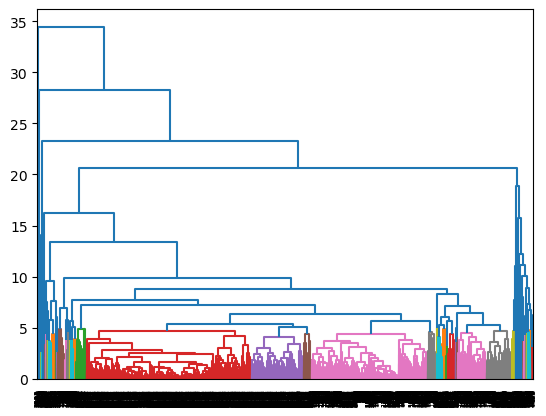

In [35]:
dn = hierarchy.dendrogram(hr,color_threshold=5)

In [36]:
Grp2 = Sd.groupby('Hier')
Values2 =  Sd.groupby('Hier').count()
Values2

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,KMeans1,DBScan
Hier,,,,,,,,,,,,,
0,170,170,170,170,170,170,170,170,170,170,170,170,170
1,3782,3782,3782,3782,3782,3782,3782,3782,3782,3782,3782,3782,3782
2,15,15,15,15,15,15,15,15,15,15,15,15,15
3,4,4,4,4,4,4,4,4,4,4,4,4,4
4,28,28,28,28,28,28,28,28,28,28,28,28,28


In [37]:
Grp2.agg('mean')

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,KMeans1,DBScan
Hier,,,,,,,,,,,,,
0,0.431927,0.144316,0.140495,2.212754,-0.062767,0.840333,1.575354,2.576057,2.770787,0.282404,0.694848,3.117647,-1.000000
1,-0.076410,-0.008718,-0.018838,-0.098242,-0.058703,-0.065160,-0.091373,-0.135333,-0.146398,-0.022406,-0.041414,0.722634,-0.206504
2,0.639719,-0.084433,1.022084,-0.098242,15.646299,3.179691,1.714614,0.033293,0.059695,0.239873,0.337527,0.000000,-1.000000
3,0.579559,0.262273,0.319946,-0.098242,-0.062767,2.008013,6.003379,13.928192,12.623311,-0.929019,1.303918,4.000000,-1.000000
4,7.272823,0.309087,1.098178,-0.098242,-0.062767,1.708943,1.001018,0.631654,1.116237,1.315979,1.008084,1.000000,-1.000000


To represent the data graphically is somewhat difficult because we have more features, and we have clustered the data based on all the features.

From the above clustering models Kmeans, DBSCAN are clustered similarily with almost same data points in the same clusters. But whereaas in the Hierarchy Clustering most of the data points are labeled under cluster '1'. This shows that given parameters are efficient for the model.